In [1]:
# Import Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_original = df.copy()

In [3]:
df_original[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [5]:
df_exploded = df_original.explode('job_skills')

In [14]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

df_skill_count = skills_count.reset_index(name='skill_count')

df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

In [23]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

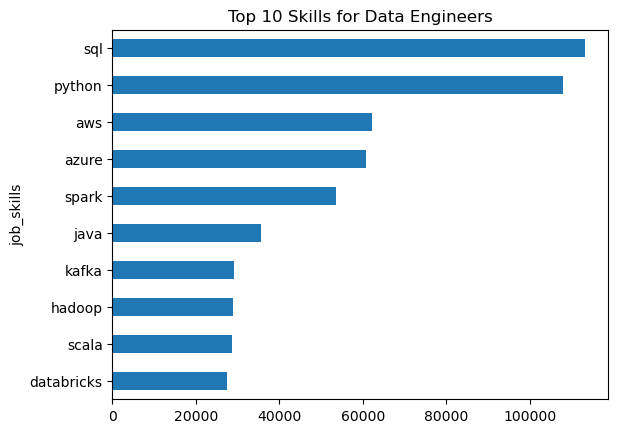

In [26]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

#invert the axis:
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')   #format with an f-string - therefore dynamic title:
plt.legend().set_visible(False)
plt.show()

